# UCI Merced dataset: Example of the `aitlas` toolbox in for multi class image classification

This notebook shows a sample implementation of a multi class image classification using the `aitlas` toolbox using the UC merced dataset.

In [1]:
from aitlas.datasets import UcMercedDataset
from aitlas.models import ResNet50
from aitlas.transforms import ResizeCenterCropFlipHVToTensor, ResizeCenterCropToTensor
from aitlas.utils import image_loader

## Load the dataset

In [2]:
dataset_config = {
    "data_dir": "/media/hdd/multi-class/UCMerced",
    "csv_file": "/media/hdd/multi-class/UCMerced/trainval.csv"
}
dataset = UcMercedDataset(dataset_config)

## Show images from the dataset

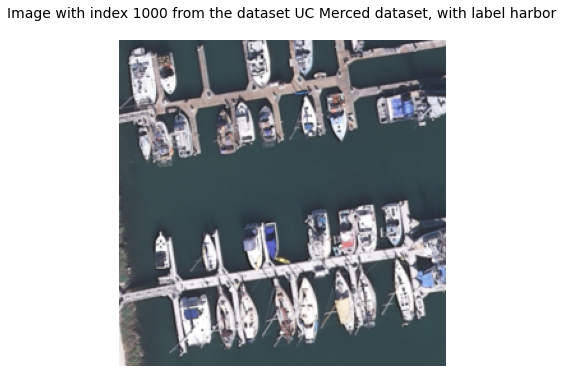

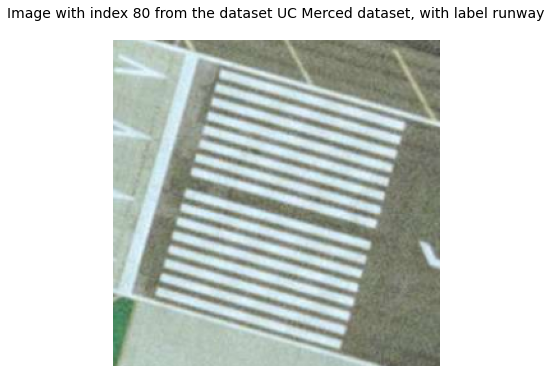

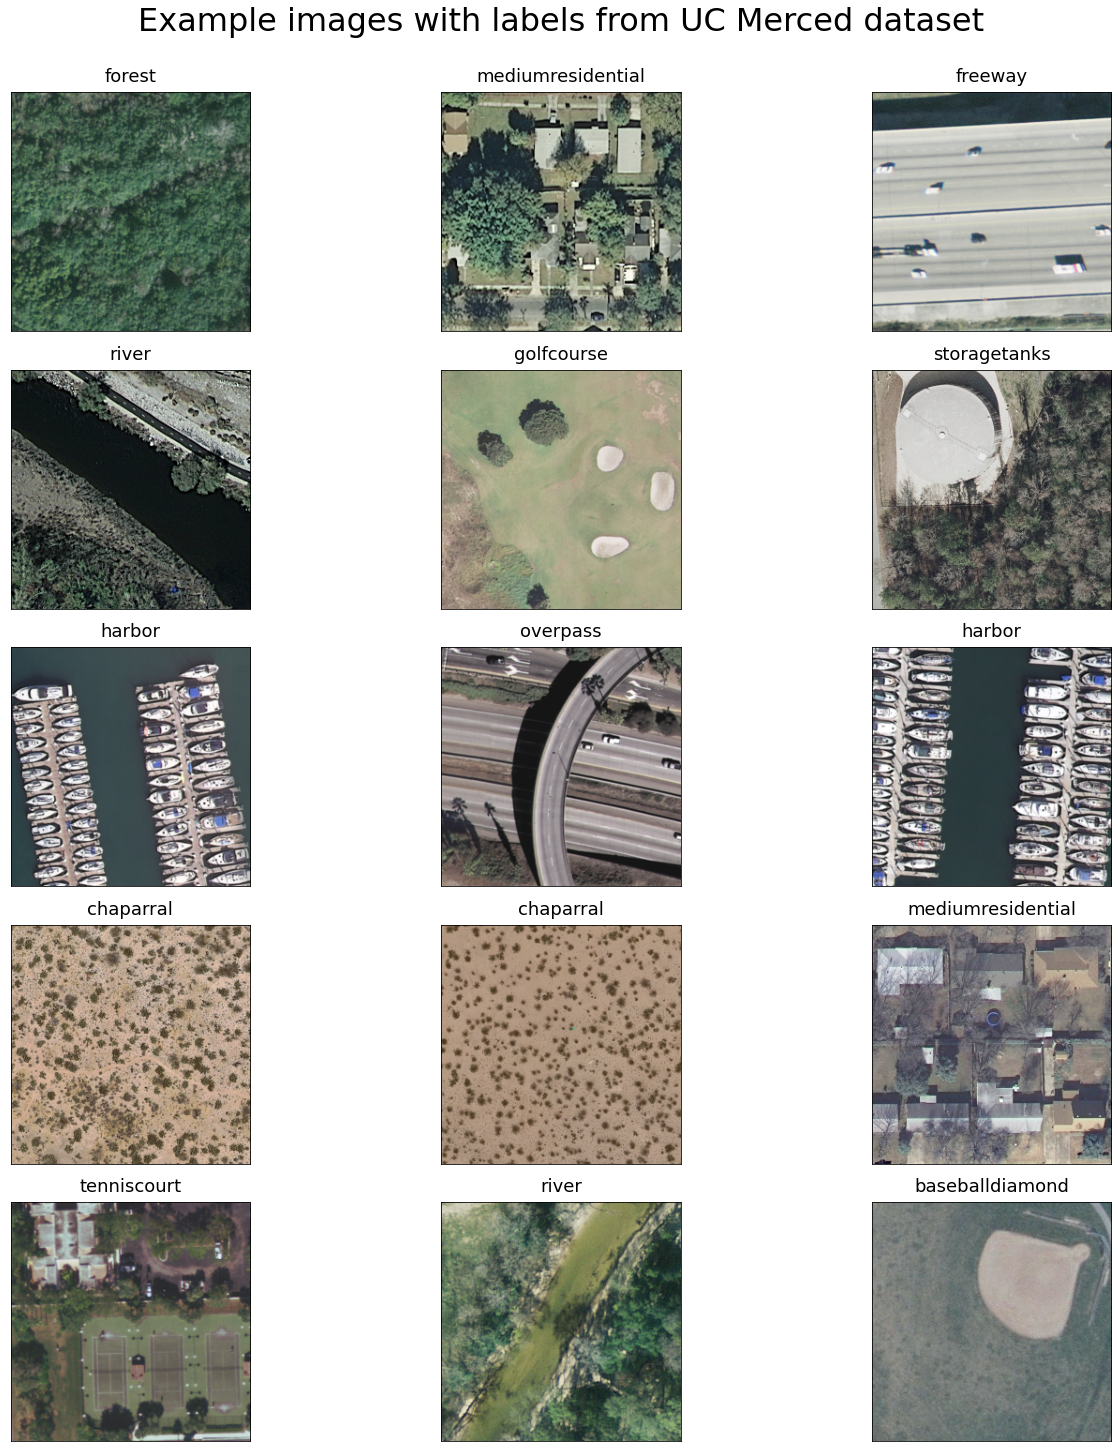

In [3]:
fig1 = dataset.show_image(1000)
fig2 = dataset.show_image(80)
fig3 = dataset.show_batch(15)

## Inspect the data

In [4]:
dataset.show_samples()

,File name,Label
0,river/river10.tif,river
1,runway/runway09.tif,runway
2,tenniscourt/tenniscourt64.tif,tenniscourt
3,beach/beach17.tif,beach
4,runway/runway21.tif,runway
5,runway/runway11.tif,runway
6,harbor/harbor89.tif,harbor
7,freeway/freeway28.tif,freeway
8,parkinglot/parkinglot68.tif,parkinglot
9,freeway/freeway63.tif,freeway


In [5]:
dataset.data_distribution_table()

,Label,Count
0,agricultural,100
1,airplane,100
2,baseballdiamond,100
3,beach,100
4,buildings,100
5,chaparral,100
6,denseresidential,100
7,forest,100
8,freeway,100
9,golfcourse,100


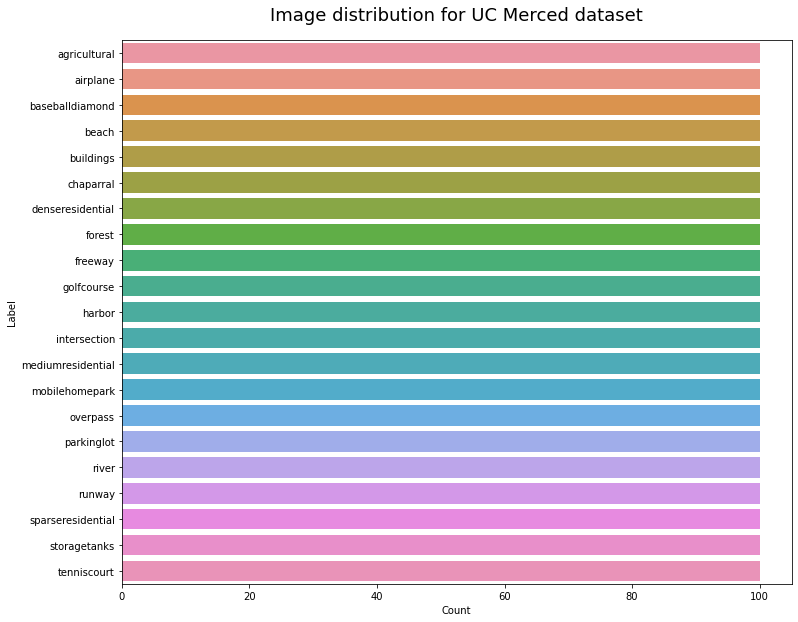

In [6]:
fig = dataset.data_distribution_barchart()

## Load train and test splits

In [7]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/hdd/multi-class/UCMerced",
    "csv_file": "/media/hdd/multi-class/UCMerced/train.csv"
}

train_dataset = UcMercedDataset(train_dataset_config)
train_dataset.transform = ResizeCenterCropFlipHVToTensor() 

test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/hdd/multi-class/UCMerced",
    "csv_file": "/media/hdd/multi-class/UCMerced/test.csv",
    "transforms": ["aitlas.transforms.ResizeCenterCropToTensor"]
}

test_dataset = UcMercedDataset(test_dataset_config)
len(train_dataset), len(test_dataset)

(1680, 420)

## Setup and create the model for training

In [8]:
epochs = 10
model_directory = "/media/ssd/aitlas_new/examples/experiment/ucmerced"
model_config = {
    "num_classes": 21, 
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["accuracy", "precision", "recall", "f1_score"]
}
model = ResNet50(model_config)
model.prepare()

## Training and evaluation

In [9]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=test_dataset,
    run_id='1',
)

2021-11-25 01:20:35,692 INFO Starting training.
training: 100%|███████████████████████████████| 105/105 [00:10<00:00, 10.38it/s]
2021-11-25 01:20:46,648 INFO epoch: 1, time: 10, loss:  0.99999
testing on train set: 100%|███████████████████| 105/105 [00:03<00:00, 32.35it/s]
2021-11-25 01:20:52,024 INFO Accuracy:0.9880952380952381, Precision Micro:0.9880952380952381, Precision Macro:0.9883470518781214, Precision Weighted:0.9883470518781214, Precision per Class:[1.         0.98765432 1.         0.98765432 0.97560976 1.
 0.91666667 0.96385542 1.         1.         1.         1.
 0.96103896 1.         0.98765432 1.         1.         1.
 0.9875     0.98765432 1.        ], Recall Micro:0.9880952380952381, Recall Macro:0.9880952380952381, Recall Weighted:0.9880952380952381, Recall per Class:[0.9875 1.     1.     1.     1.     1.     0.9625 1.     1.     0.975
 1.     0.975  0.925  0.975  1.     1.     0.9625 1.     0.9875 1.
 1.    ], F1_score Micro:0.9880952380952381, F1_score Macro:0.988106

testing on validation set: 100%|██████████████| 105/105 [00:01<00:00, 78.60it/s]
2021-11-25 01:21:37,327 INFO Accuracy:0.969047619047619, Precision Micro:0.969047619047619, Precision Macro:0.9740488788107836, Precision Weighted:0.9740488788107835, Precision per Class:[1.         1.         1.         1.         1.         1.
 1.         0.95238095 1.         0.95238095 1.         0.95238095
 0.74074074 1.         1.         0.95238095 1.         0.95238095
 0.95238095 1.         1.        ], Recall Micro:0.969047619047619, Recall Macro:0.9690476190476192, Recall Weighted:0.9690476190476189, Recall per Class:[0.95 1.   0.95 1.   1.   1.   0.75 1.   0.95 1.   1.   1.   1.   0.8
 1.   1.   1.   1.   1.   1.   0.95], F1_score Micro:0.969047619047619, F1_score Macro:0.9689614290400114, F1_score Weighted:0.9689614290400109, F1_score per Class:[0.97435897 1.         0.97435897 1.         1.         1.
 0.85714286 0.97560976 0.97435897 0.97560976 1.         0.97560976
 0.85106383 0.88888889 1.

training: 100%|███████████████████████████████| 105/105 [00:10<00:00, 10.34it/s]
2021-11-25 01:22:31,636 INFO epoch: 8, time: 10, loss:  0.07284
testing on train set: 100%|███████████████████| 105/105 [00:03<00:00, 32.51it/s]
2021-11-25 01:22:34,872 INFO Accuracy:0.9994047619047619, Precision Micro:0.9994047619047619, Precision Macro:0.9994121105232217, Precision Weighted:0.9994121105232217, Precision per Class:[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.98765432 1.         1.         1.         1.         1.
 1.         1.         1.        ], Recall Micro:0.9994047619047619, Recall Macro:0.9994047619047619, Recall Weighted:0.9994047619047619, Recall per Class:[1.     1.     1.     1.     1.     1.     1.     1.     1.     1.
 1.     1.     1.     0.9875 1.     1.     1.     1.     1.     1.
 1.    ], F1_score Micro:0.9994047619047619, F1_score Macro:0.9994047386523651, F1_score Weighted:0.9994047386523649, F

## Predictions

2021-11-25 01:23:11,459 INFO Loading checkpoint /media/ssd/aitlas_new/examples/experiment/ucmerced/checkpoint.pth.tar
2021-11-25 01:23:11,601 INFO Loaded checkpoint /media/ssd/aitlas_new/examples/experiment/ucmerced/checkpoint.pth.tar at epoch 11


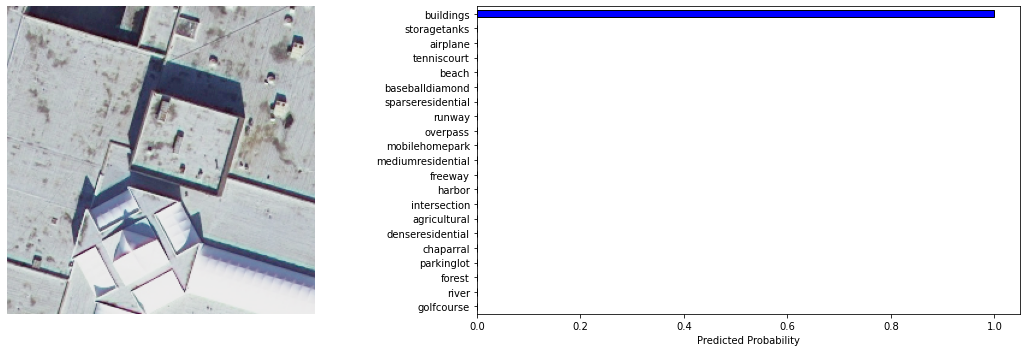

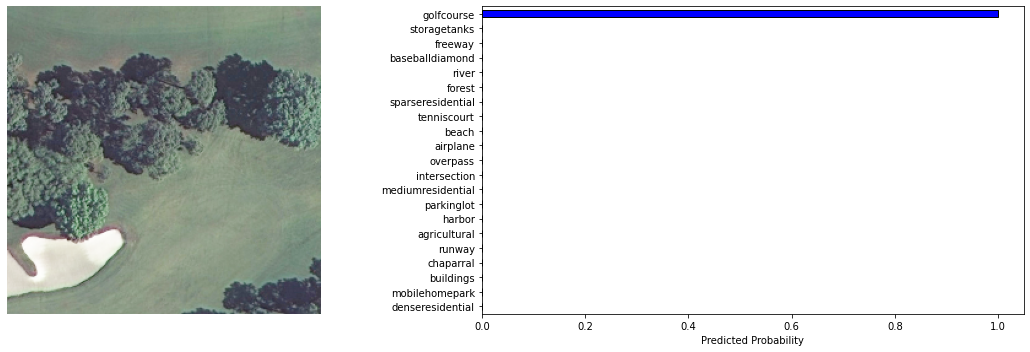

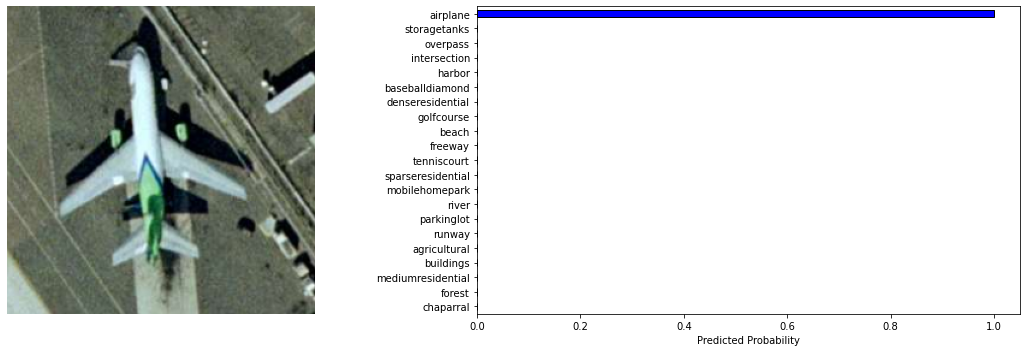

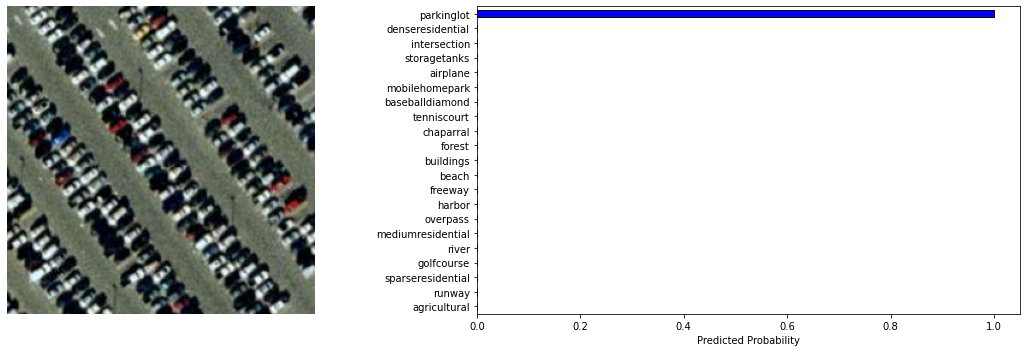

In [10]:
model_path = "/media/ssd/aitlas_new/examples/experiment/ucmerced/checkpoint.pth.tar"
#labels = UcMercedDataset.labels
labels = ["agricultural", "airplane", "baseballdiamond", "beach", "buildings", "chaparral",
                        "denseresidential", "forest", "freeway", "golfcourse", "harbor", "intersection",
                        "mediumresidential", "mobilehomepark", "overpass", "parkinglot", "river", "runway",
                        "sparseresidential", "storagetanks", "tenniscourt"]
transform = ResizeCenterCropToTensor()
model.load_model(model_path)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/buildings98.tif')
fig = model.predict_image(image, labels, transform)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/golfcourse04.tif')
fig = model.predict_image(image, labels, transform)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/airplane18.tif')
fig = model.predict_image(image, labels, transform)

image = image_loader('/media/ssd/uc_merced_multilabel/predict/parkinglot13.tif')
fig = model.predict_image(image, labels, transform)